In [1]:
import drawSvg as draw
import yaml
from shapely.geometry import Polygon,Point
import matplotlib.pyplot as plt
import random
import copy

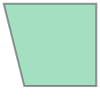

In [23]:
data = yaml.safe_load(open("sanglier_terrain1.yml"))
outline = [(p[0],p[1]) for p in data['geometry']['outline']]
holes = [[(p[0],p[1]) for p in hole] for hole in data['geometry']['holes']]
polygon = Polygon(outline, holes)
polygon

In [142]:
# Distribute all trees
tree_list=[]
range_x = (polygon.bounds[0],polygon.bounds[2])
range_y = (polygon.bounds[1],polygon.bounds[3])
distance_min = data['params']['distance_min']
distance_max = 4
ratio_distance_free = 0.33

trees_to_place = []
for index_type,tree_type in enumerate(data['trees']):
    for i in range(0,tree_type['count']):
        trees_to_place.append({"type": index_type})

random.shuffle(trees_to_place)      
#trees_to_place

In [145]:
tree_list = []
for index, tree_to_place in enumerate(trees_to_place):
        tree_placed = False
        max_tries = 1e6
        nb_tries = 0
        while not tree_placed and nb_tries < max_tries:
            point = (random.uniform(*range_x), random.uniform(*range_y))
            if polygon.contains(Point(*point)):
                if float(index)/float(len(trees_to_place)) <= ratio_distance_free:
                    tree_placed = True
                else:
                    tree_placed = True if 0 == len(tree_list) else False
                    for existing_tree in tree_list:
                        if Point(*point).distance(Point(*existing_tree['position'])) <= distance_max:
                            tree_placed = True
                            break
                if tree_placed:
                    for existing_tree in tree_list:
                        if Point(*point).distance(Point(*existing_tree['position'])) < distance_min:
                            tree_placed = False
                            break
                
            if tree_placed:
                tree_list.append({'type':tree_to_place['type'],'position':point})
            nb_tries += 1
            
        if max_tries <= nb_tries:
            raise("Failed to placed tree !")
            
            
tree_list

[{'type': 0, 'position': (11.330592202229035, 18.94023915404304)},
 {'type': 2, 'position': (6.979500385282367, 13.501899221183113)},
 {'type': 1, 'position': (42.03029941944173, 17.35701075049647)},
 {'type': 4, 'position': (38.449256125674026, 13.477862700351153)},
 {'type': 1, 'position': (14.750334520457391, 18.01530454505846)},
 {'type': 2, 'position': (24.384410648043236, 38.88027977318871)},
 {'type': 1, 'position': (13.17851817868667, 17.32119114317818)},
 {'type': 0, 'position': (19.10766733081132, 31.97138728833817)},
 {'type': 4, 'position': (23.93547500329079, 36.14268859378199)},
 {'type': 4, 'position': (27.021425515041784, 35.09529629336675)},
 {'type': 3, 'position': (17.21261679977165, 28.913414819432752)},
 {'type': 0, 'position': (25.64486072224051, 15.889134335520474)},
 {'type': 0, 'position': (25.632820670193723, 25.116404687052267)},
 {'type': 4, 'position': (33.57889690998178, 35.55977327463545)},
 {'type': 4, 'position': (28.863261250493423, 24.440024071234173)

In [21]:
#tree_list_file = copy.deepcopy(tree_list)
#for tree in tree_list_file:
#    tree['position'] = list(tree['position'])

#with open("placement_terrain1_2.yml","w") as f:
#    yaml.dump(tree_list_file, f, default_flow_style=None)

tree_list = yaml.safe_load(open("placement_terrain1_2.yml"))

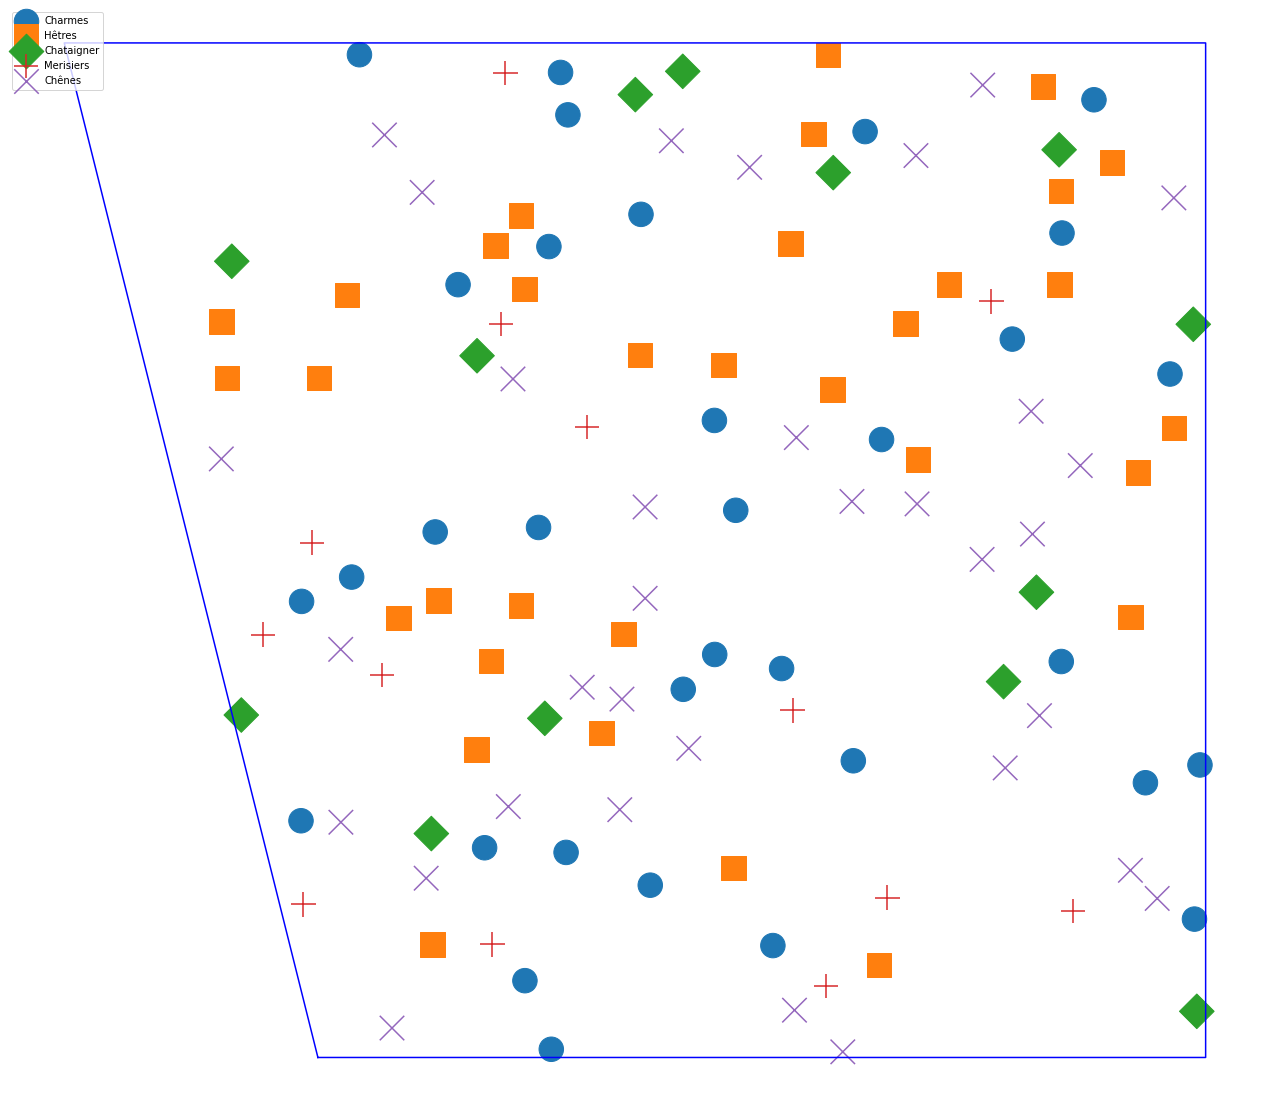

In [24]:
x,y = polygon.exterior.xy
tree_positions_x = [p['position'][0] for p in tree_list]
tree_positions_y = [p['position'][1] for p in tree_list]
plt.figure(figsize=[polygon.bounds[2]/2, polygon.bounds[3]/2])
plt.axis('equal')
plt.axis('off')
plt.plot(*polygon.exterior.xy,color="blue")
for i in polygon.interiors:
    plt.plot(*i.xy,color="blue")
     
for type_index, tree_type in enumerate(data["trees"]):
    positions_x = [p['position'][0] for p in tree_list if p['type'] == type_index]
    positions_y = [p['position'][1] for p in tree_list if p['type'] == type_index]
    marker_size = [600 for p in tree_list if p['type'] == type_index]
    plt.scatter(positions_x,positions_y,marker=tree_type['marker'],s=marker_size,label=tree_type["name"])
    
plt.legend(loc='upper left')
plt.savefig("terrain1.pdf", bbox_inches='tight')

In [74]:


# Draw an irregular polygon
d.append(draw.Lines(polygon.exterior.,
                    close=False,
            fill='transparent',
            stroke='black'))
d

TypeError: __init__() missing 1 required positional argument: 'sy'

In [60]:
d